### Importing Important Libraries

In [1]:
from sklearn.linear_model import  LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score,  confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import warnings 
warnings.filterwarnings('ignore')

%load_ext autotime

time: 0 ns (started: 2022-05-08 23:08:07 +05:00)


### Loading Dataset

In [2]:
full_df = pd.read_csv('heart_2020.csv')
full_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


time: 313 ms (started: 2022-05-08 23:08:24 +05:00)


### Pre-Processing

In [3]:
full_df["HeartDisease"] = pd.Categorical(full_df["HeartDisease"]).codes
X_full = full_df.drop(columns = ['HeartDisease'])
y_full = full_df[['HeartDisease']]
x_onehot_full = pd.get_dummies(X_full, drop_first = True)
x_onehot_full.columns = x_onehot_full.columns.str.replace(' ','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace('-','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace(')','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace('(','_')
x_onehot_full.columns = x_onehot_full.columns.str.replace(',','_')

time: 312 ms (started: 2022-05-08 23:08:42 +05:00)


### Fitting the model

In [4]:

lr = LogisticRegression(class_weight= 'balanced', max_iter = 500)

lr.fit(x_onehot_full, y_full)

LogisticRegression(class_weight='balanced', max_iter=500)

time: 16.1 s (started: 2022-05-08 23:09:00 +05:00)


### Evaluating the model (Optional)

Test AUC-ROC of the model is:  %.3f %  0.8422110232180792


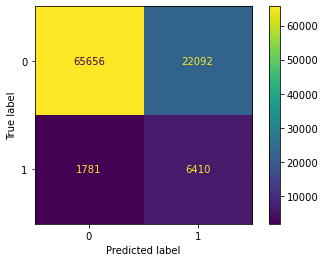

recall:  78.25662312293981
precision:  22.489649849133393
time: 329 ms (started: 2022-05-08 23:14:10 +05:00)


In [22]:

x_test_full = pd.read_csv('x_test_full.csv')
y_test_full = pd.read_csv('y_test_full.csv')

md_probs = lr.predict_proba(x_test_full)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(y_test_full, md_probs)
print('Test AUC-ROC of the model is:  %.3f % ', md_auc)

pred = lr.predict(x_test_full)
confusion = confusion_matrix(y_test_full, pred)

display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.grid(False)
plt.show()
print("recall: ", (confusion[1][1]/(confusion[1][0] +confusion[1][1]))*100)
print("precision: ", (confusion[1][1]/(confusion[0][1] +confusion[1][1]))*100)

### Saving the trained model

In [164]:
filename = 'trained_model.sav'
pickle.dump(vc, open(filename, 'wb'))


time: 78 ms (started: 2022-05-08 22:49:25 +05:00)
